In [1]:
import pandas as pd
import sqlite3

In [2]:
conn = sqlite3.connect("factbook.db")

q = "SELECT * FROM sqlite_master WHERE type='table';"
pd.read_sql_query(q, conn)

,type,name,tbl_name,rootpage,sql
0,table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
1,table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY..."


In [3]:
q = "SELECT * FROM facts LIMIT 5"
pd.read_sql_query(q, conn)

,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
0,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
1,2,al,Albania,28748,27398,1350,3029278,0.30,12.92,6.58,3.30
2,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
3,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.00
4,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


In [6]:
q = "SELECT MIN(population), MAX(population), MIN(population_growth), MAX(population_growth) FROM facts"
pd.read_sql_query(q, conn)

,MIN(population),MAX(population),MIN(population_growth),MAX(population_growth)
0,0,7256490011,0.0,4.02


### Identify anomalies
The above shows us that some countries in the database table have population count of zero. Find these countries.

In [7]:
q = "SELECT NAME FROM facts WHERE population = 0"
pd.read_sql_query(q, conn)

,name
0,Antarctica


Now find the countries with the maximum number of people (7256490011).

In [8]:
q = "SELECT NAME FROM facts WHERE population = (SELECT MAX(population) FROM facts)"
pd.read_sql_query(q, conn)

,name
0,World


### Generate histogram plots from the dataset

In [11]:
q = "SELECT population, population_growth, birth_rate, death_rate FROM facts WHERE population < (SELECT MAX(population) FROM facts) AND population > 0"
facts = pd.read_sql_query(q, conn)

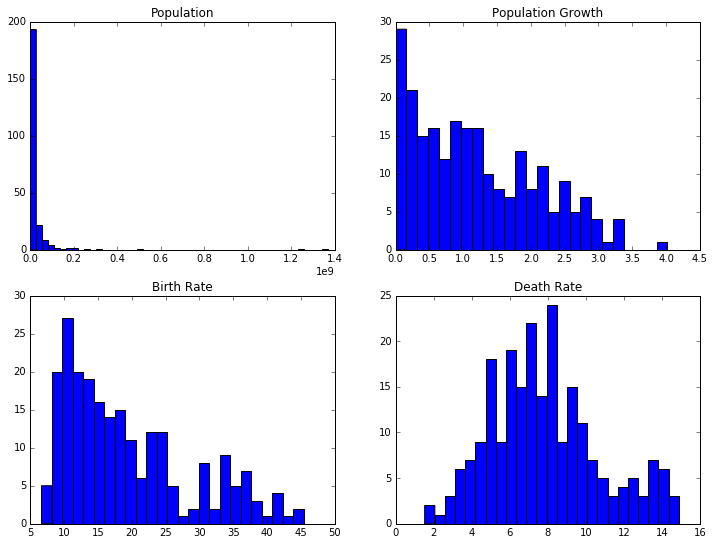

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

fig = plt.figure(figsize=(12, 9))
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_title("Population")
ax2 = fig.add_subplot(2, 2, 2)
ax2.set_title("Population Growth")
ax3 = fig.add_subplot(2, 2, 3)
ax3.set_title("Birth Rate")
ax4 = fig.add_subplot(2, 2, 4)
ax4.set_title("Death Rate")
facts['population'].hist(bins=50, grid=False, ax=ax1)
facts['population_growth'].hist(bins=25, grid=False, ax=ax2)
facts['birth_rate'].hist(bins=25, grid=False, ax=ax3)
facts['death_rate'].hist(bins=25, grid=False, ax=ax4)
